<a href="https://colab.research.google.com/github/sudheerdas43/AI-Lab-KNN/blob/main/KNN_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

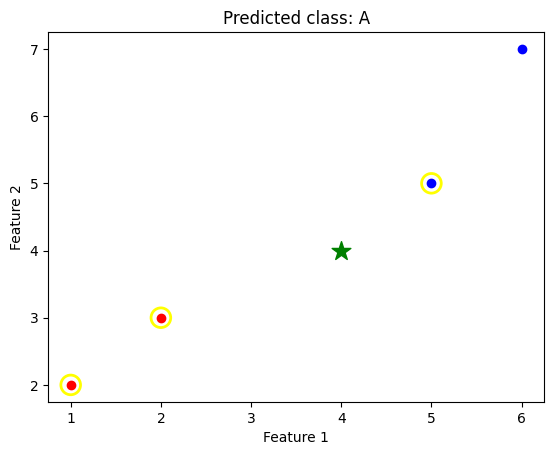

Classified as: A


In [1]:
import matplotlib.pyplot as plt
from collections import Counter

# Simple 2-feature dataset
data = [
    ([1, 2], 'A'),
    ([2, 3], 'A'),
    ([5, 5], 'B'),
    ([6, 7], 'B')
]

def distance(p1, p2):
    total = 0
    for i in range(len(p1)):
        total += (p1[i] - p2[i]) ** 2
    return total ** 0.5

def knn(test_point, data, k=3):
    distances = []
    for features, label in data:
        dist = distance(test_point, features)
        distances.append((dist, label, features))
    distances.sort(key=lambda x: x[0])
    neighbors = distances[:k]

    labels = [label for _, label, _ in neighbors]
    prediction = Counter(labels).most_common(1)[0][0]

    # Plot all points
    for features, label in data:
        color = 'red' if label == 'A' else 'blue'
        plt.scatter(features[0], features[1], c=color)

    # Highlight neighbors with yellow circle
    for _, _, features in neighbors:
        plt.scatter(features[0], features[1], facecolors='none', edgecolors='yellow', s=200, linewidths=2)

    # Plot test point as green star
    plt.scatter(test_point[0], test_point[1], c='green', marker='*', s=200)
    plt.title(f'Predicted class: {prediction}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

    return prediction

test_point = [4, 4]
print("Classified as:", knn(test_point, data))